# Two Parent Population
## Second try
### 99/09/18 and 25

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Sex ratio is the ratio of male to female population and in our assumptions it is constant along time. In reality male infants are more commun and also it is more probable to die early for him. Overall this is the sex ratio it has been assumed for adault population. 

In [2]:
sex_ratio = 107/207

#first generation population is assumed to be two, equally one couple.
n_f = 1
n_m = 1

We are counting couples assuming every single person is going to join with a person of the opposite sex if there exist any. Moreover it is assumed that they marry once and with one person.

In [3]:
#calculating female and male population 
#using poisson distribution and for a given female and male population for an aritrary sex ratio 
def next_gen(n_f, n_m, sex_ratio, lam):
    n_couples = np.min([n_f, n_m])
    
    #new generation
    n_f = 0
    n_m = 0
    for i in range(n_couples):
        inf_num = np.random.poisson(lam, 1)
        for j in range(int(inf_num)):
            if random.random() > sex_ratio:
                n_f = n_f + 1
            else:
                n_m = n_m + 1
    
    return int(n_f), int(n_m) 

Wall time: 2.87 s


Text(0.5, 1.0, 'Population Dynamics (sex ratio = 150)\n Female-Male')

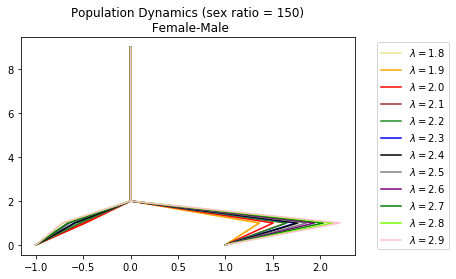

In [8]:
%%time

sex_ratio = 150/200
x = 10
time = np.arange(x)
lam_mat = np.arange(1.8, 3, 0.1)

color = ['khaki','orange', 'red', 'brown', 'forestgreen', 'blue', 'black', 'gray', 'purple', 'green', 'lawngreen', 'pink' ]

for lam in lam_mat:
    pop = np.zeros((x, 2))
    pop[0, 0] = n_f
    pop[0, 1] = n_m

    ave = 1000
    pop_1run  = np.zeros((ave, 2))

    for t in range(x-1):
        for i in range(ave):
            pop_1run[i, 0], pop_1run[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, lam)
        pop[t + 1, 0], pop[t + 1, 1] = np.mean(pop_1run[:, 0]), np.mean(pop_1run[:, 1])
    
    index = int(np.where(np.isclose(lam_mat, lam))[0])
    plt.plot(-pop[:, 0], time, c = color[index], label = f'$\lambda = {np.round(lam, 2)}$') #female
    plt.plot( pop[:, 1], time, c = color[index])   #male

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"Population Dynamics (sex ratio = {int(sex_ratio * 200)})\n Female-Male")
# plt.savefig("popdyn.png")

Wall time: 53.9 s


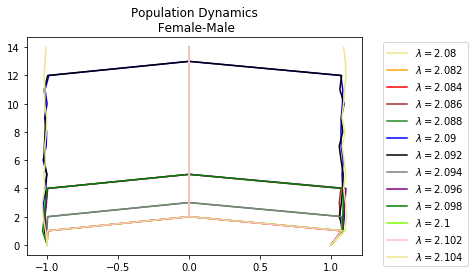

In [25]:
%%time

x = 15
time = np.arange(x)
lam_mat = np.arange(2.08, 2.104, 0.002)

color = ['khaki','orange', 'red', 'brown', 'forestgreen', 'blue', 'black', 'gray', 'purple', 'green', 'lawngreen', 'pink']

for lam in lam_mat:
    pop = np.zeros((x, 2))
    pop[0, 0] = n_f
    pop[0, 1] = n_m

    ave = 10000
    pop_1run  = np.zeros((ave, 2))

    for t in range(x-1):
        for i in range(ave):
            pop_1run[i, 0], pop_1run[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, lam)
        pop[t + 1, 0], pop[t + 1, 1] = np.mean(pop_1run[:, 0]), np.mean(pop_1run[:, 1])
    
    index = int(np.where(np.isclose(lam_mat, lam))[0])%np.size(color)
    plt.plot(-pop[:, 0], time, c = color[index], label = f'$\lambda = {np.round(lam, 4)}$') #female
    plt.plot( pop[:, 1], time, c = color[index])   #male

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Population Dynamics\n Female-Male")
plt.savefig("popdyn3.png")

### critical value
Loking for the critical value of $\lambda$.

In [9]:
#does it extinc?

def extinc(nf_0, nm_0, lam):
    pop  = [[nf_0, nm_0]]
    pop_0 = nf_0 + nm_0
    time = []
    i = 0
    while 1:
        n_f, n_m = next_gen(pop[i][0], pop[i][1],sex_ratio , lam)
        pop = np.vstack((pop, [n_f, n_m]))
        i += 1
        pop_i = n_f + n_m
        if pop_i < 0.1 * pop_0 or np.max([n_f, n_m]) == 0:
            return 1
        if pop_i > 4 * pop_0:
            return 0

In [10]:
#probability of extinction

def ext_prob(nf_0, nm_0, lam):
    samples = 1000
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(nf_0, nm_0, lam)

    extinction_probability = extinctions / samples

    return extinction_probability

For different initial populations:

[0.23  0.253 0.256 0.266 0.294 0.296 0.34  0.322 0.331 0.351 0.372 0.359
 0.404 0.429 0.457 0.431 0.438 0.466 0.485 0.523 0.515 0.52  0.561 0.587
 0.563 0.587 0.602 0.632 0.627 0.628]
[0.013 0.016 0.03  0.04  0.056 0.073 0.103 0.117 0.156 0.194 0.222 0.296
 0.328 0.417 0.445 0.533 0.562 0.673 0.704 0.76  0.798 0.828 0.883 0.896
 0.913 0.934 0.951 0.963 0.969 0.98 ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.003 0.003 0.022 0.102
 0.367 0.743 0.942 0.988 0.999 0.998 1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.   ]
Wall time: 2min 58s


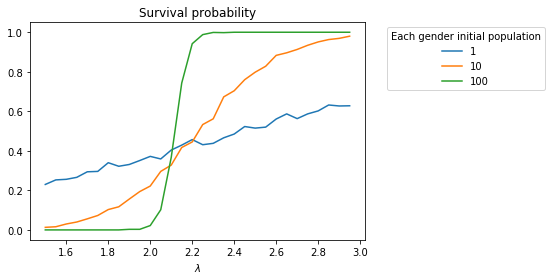

In [205]:
%%time

lam_mat     = np.arange(1.5, 3, 0.05)
probability = np.zeros(np.size(lam_mat)) 

initial_pop = [[1, 1], [10, 10], [100, 100]]

for j in range(np.shape(initial_pop)[0]):
    nf_0 = initial_pop[j][0]
    nm_0 = initial_pop[j][1]

    for i in range(np.size(lam_mat)):
        probability[i] = ext_prob(nf_0, nm_0, lam_mat[i])


    plt.plot(lam_mat, 1-probability, label = f'{initial_pop[j][0]}')
    
    print((1-probability))
    
plt.title("Survival probability")
plt.xlabel("$\lambda$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Each gender initial population')

 For diffrent sex ratio:

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.002 0.005 0.029 0.158 0.466 0.736 0.909 0.953 0.988 0.992 0.997
 0.999 0.999 1.    1.    1.   ]
[0.    0.    0.    0.002 0.04  0.254 0.588 0.818 0.933 0.974 0.999 0.998
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.   ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.002 0.069 0.351 0.719 0.879 0.966 0.982 0.996 0.999
 0.999 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.   ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.005 0.052 0.347 0.726 0.893 0.962 0.99  0.998 1.
 0.999 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.   ]
Wall time: 33min 29s


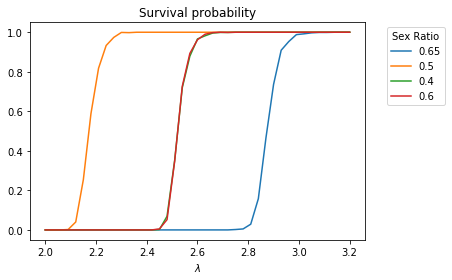

In [11]:
%%time

lam_mat     = np.arange(2, 3.2, 0.03)
probability = np.zeros(np.size(lam_mat)) 

sex_ratio_mat = [130/200, 0.5, 0.4, 120/200]
initial_pop = [50, 50]
for sex_ratio in sex_ratio_mat:
    nf_0 = initial_pop[0]
    nm_0 = initial_pop[1]

    for i in range(np.size(lam_mat)):
        probability[i] = ext_prob(nf_0, nm_0, lam_mat[i])


    plt.plot(lam_mat, 1-probability, label = f'{sex_ratio}')
    
    print((1-probability))
    
plt.title("Survival probability")
plt.xlabel("$\lambda$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Sex Ratio')

Wall time: 36min 59s


Text(0.5, 0, '$\\lambda$')

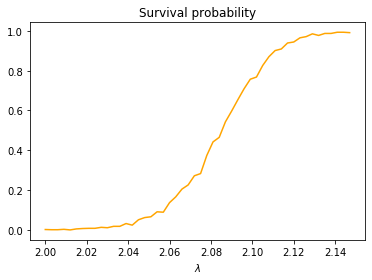

In [32]:
%%time
sex_ratio = 0.5
lam_mat     = np.arange(2, 2.15, 0.003)
probability = np.zeros(np.size(lam_mat)) 

nf_0 = 300
nm_0 = 300

for i in range(np.size(lam_mat)):
    probability[i] = ext_prob(nf_0, nm_0, lam_mat[i])
    
    
plt.plot(lam_mat, 1-probability, c = 'orange')
plt.title("Survival probability")
plt.xlabel("$\lambda$")


In [37]:
print((1-probability), '\n', lam_mat[23:], np.size(lam_mat))

[0.002 0.001 0.001 0.003 0.    0.005 0.007 0.008 0.008 0.013 0.011 0.018
 0.018 0.032 0.024 0.051 0.062 0.066 0.091 0.089 0.137 0.166 0.205 0.226
 0.272 0.283 0.374 0.442 0.465 0.543 0.597 0.654 0.709 0.757 0.768 0.826
 0.87  0.901 0.909 0.939 0.944 0.965 0.971 0.985 0.977 0.987 0.987 0.993
 0.993 0.991] 
 [2.069 2.072 2.075 2.078 2.081 2.084 2.087 2.09  2.093 2.096 2.099 2.102
 2.105 2.108 2.111 2.114 2.117 2.12  2.123 2.126 2.129 2.132 2.135 2.138
 2.141 2.144 2.147] 50


So we ar going to assume $\lambda_c = 2.07$ and then fitting the critical exponent.

λ_c =  2.0690000000000026


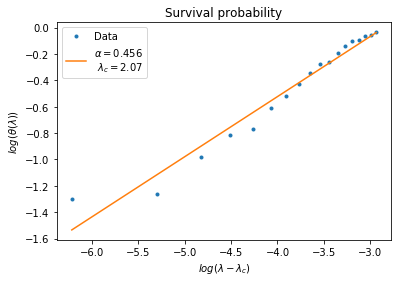

In [45]:
fit = np.polyfit(np.log(lam_mat[24:42]-2.07), np.log(1-probability[24:42]), 1)

print("\u03BB_c = ", lam_mat[23])

plt.plot(np.log(lam_mat[24:42]-2.07), np.log(1-probability[24:42]), '.', label = 'Data')
plt.plot(np.log(lam_mat[24:42]-2.07), fit[0] * np.log(lam_mat[24:42] - 2.07) + fit[1], 
         label = f'$\u03B1={np.round(fit[0], 3)}$ \n $\u03BB_c = 2.07$')

plt.title("Survival probability")
plt.ylabel("$log(\u03B8 (\lambda))$")
plt.xlabel("$log(\lambda - \lambda_c)$")

plt.legend()

plt.savefig("1exptp02.png")

### Mean size
We are looking for cumulative population and it is finite for $\lambda$s which extinct and infinite for which don't for sure.


In [4]:
def final_cumulative_population(lam):
    total_population = 0
    pop  = [[1, 1]]
    i = 0
    while pop[i][0] > 0 and pop[i][1] > 0:
        n_f, n_m = next_gen(pop[i][0], pop[i][1],sex_ratio , lam)
        pop = np.vstack((pop, [n_f, n_m]))
        total_population += (n_f + n_m)
        i += 1
    return total_population

Wall time: 9.25 s


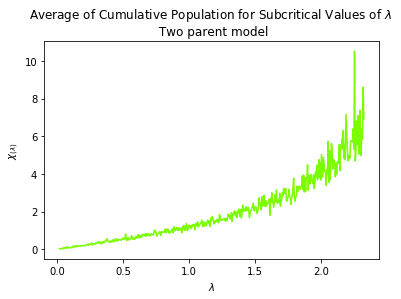

In [24]:
%%time


lam_mat = np.arange(0.02, 2.325, 0.005)
cum_pop = []
 

for lam in lam_mat:
    ave = 200
    cum_pop_1run = np.zeros(ave)
    for m in range(ave):
        cum_pop_1run[m] = final_cumulative_population(lam)
    cum_pop.append(np.mean(cum_pop_1run[:]))
    
    
plt.plot(lam_mat, cum_pop, c = 'lawngreen')
plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$ \n Two parent model")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")


plt.savefig("2exptp01.png")

[-1.25909118  0.17750268]


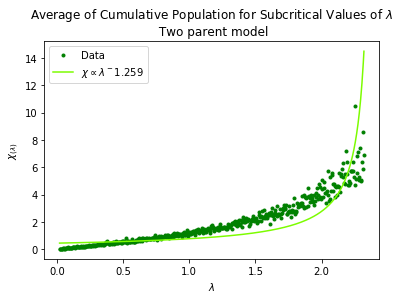

In [37]:
lam_c = 2.4
fit2 = np.polyfit(np.log(np.abs(lam_mat-lam_c)), np.log(cum_pop), 1)
print(fit2)

plt.plot(lam_mat, cum_pop, '.', c = 'green', label = 'Data')
plt.plot(lam_mat, np.e ** (fit21[0] * np.log(np.abs(lam_mat-lam_c)) + fit21[1]), 
         c = 'lawngreen', label = f'$\chi \propto \u03BB^{np.round(fit2[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$ \n Two parent model")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")
# plt.xlim(0, 1.2)
plt.legend()

# plt.savefig("2exptp02.png")

Text(0.5, 0, '$\\lambda$')

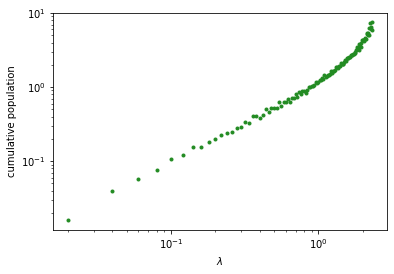

In [15]:
plt.loglog(lam_mat, cum_pop, '.', c = 'forestgreen')
plt.ylabel('cumulative population')
plt.xlabel('$\lambda$')

fitting $\chi \propto \lambda ^ \alpha$ instead $\chi \propto |\lambda - \lambda_c| ^ \alpha$

[1.25601892 0.3562234 ]


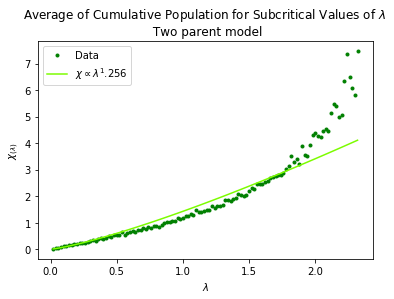

In [9]:
fit2 = np.polyfit(np.log(np.abs(lam_mat)), np.log(cum_pop), 1)
print(fit2)

plt.plot(lam_mat, cum_pop, '.', c = 'green', label = 'Data')
plt.plot(lam_mat, np.e ** (fit2[0] * np.log(np.abs(lam_mat)) + fit2[1]), 
         c = 'lawngreen', label = f'$\chi \propto \u03BB^{np.round(fit2[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$ \n Two parent model")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")
# plt.xlim(0, 1.2)
plt.legend()

plt.savefig("2exptp02.png")

Using curve_fit function. The method is still least square, but it is directy fitting without taking logarithm of data. 

[2.10981213 0.99811364]


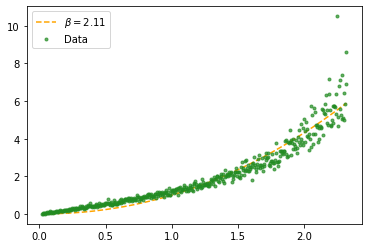

In [36]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

def fit_function(lam_mat, beta, k):
    '''poisson function, parameter lamb is the fit parameter'''
    return k * (lam_mat) ** beta


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, lam_mat, cum_pop)

print(parameters)
# plot poisson-deviation with fitted parameter
plt.plot(
    lam_mat,
    fit_function(lam_mat, *parameters),
    linestyle='--', c = 'orange',
    label=f'$\u03B2 = {np.round(parameters[0], 2)}$'
)


plt.plot(
    lam_mat,
    cum_pop,
    '.', c = 'forestgreen', alpha = 0.7, label = 'Data'
)

# plt.plot(
#     lam_mat,
#     parameters[1] * (lam_mat) ** parameters[0],
#     'o', c = 'forestgreen', alpha = 0.1, label = 'Data'
# )
plt.legend()

In [19]:
def fit_function(lam_mat, beta, k, lam_c):
    '''poisson function, parameter lamb is the fit parameter'''
    return k * (lam_mat-lam_c) ** beta


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, lam_mat, cum_pop)

print(parameters)
# plot poisson-deviation with fitted parameter
plt.plot(
    lam_mat,
    fit_function(lam_mat, *parameters),
    linestyle='--', c = 'orange',
    label=f'$\u03B2 = {np.round(parameters[0], 2)}$'
)


plt.plot(
    lam_mat,
    cum_pop,
    '.', c = 'forestgreen', alpha = 0.7, label = 'Data'
)

plt.legend()

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

In [28]:
def population(lam, generation):
    n_f, n_m = 1, 1
    survival = np.zeros(generation)
    survival[0] = 1
    for t in range(generation):
        n_f, n_m = next_gen(n_f, n_m,sex_ratio , lam)
        new_pop = n_f + n_m

        if t < generation-1 and new_pop > 0:
            survival[t+1] = 1
        else:
            break
    return survival

Wall time: 752 ms


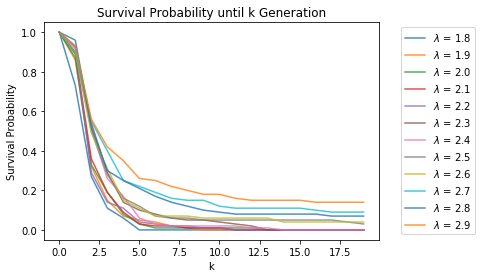

In [292]:
%%time

generation = 20
samples    = 100


lam_mat = np.arange(1.8, 3, 0.1)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.savefig("Survival Probability two parent.png")

Wall time: 16 s


Text(0.5, 0, 'k')

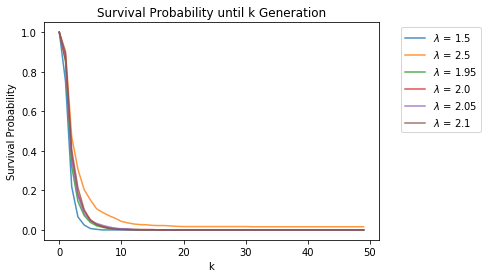

In [297]:
%%time

generation = 50
samples    = 1000


lam_mat = np.append([1.5, 2.5], np.arange(1.95, 2.15, 0.05))

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3_0\lib\site-packa

Wall time: 833 ms


Text(0.5, 0, 'k')

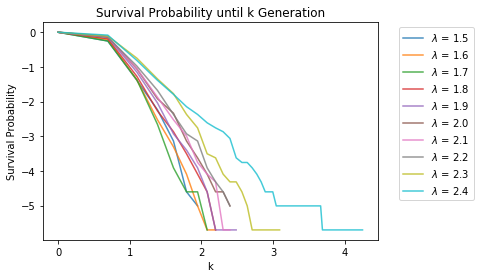

In [83]:
%%time

generation = 70
samples    = 300


# lam_mat = np.array([1.5, 2.07, 2.5]) #
# lam_mat = np.append([1.5, 2.5], np.arange(2.05, 2.09, 0.01))
lam_mat = np.arange(1.5, 2.5, 0.1)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
#     print(survival_probability[6:])
    plt.plot(np.log(np.arange(generation)+1), np.log(survival_probability), alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")



[0.0486 0.0347 0.0239 0.0163 0.0111 0.0086 0.0066 0.0053 0.004  0.0031
 0.0022 0.0015 0.0014 0.001  0.001  0.0008 0.0007 0.0007 0.0006 0.0005
 0.0005 0.0005 0.0003 0.0003 0.0003 0.0003 0.0002 0.0002 0.0002 0.0002
 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002
 0.0002 0.0002 0.0002 0.0002 0.0002 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.    ]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


[0.0513 0.0357 0.0238 0.0163 0.0115 0.0086 0.0061 0.005  0.0037 0.0032
 0.0027 0.0021 0.0018 0.0014 0.0011 0.0007 0.0006 0.0005 0.0005 0.0004
 0.0004 0.0004 0.0004 0.0004 0.0003 0.0001 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.    ]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


[0.0513 0.0354 0.025  0.0184 0.0139 0.0095 0.0067 0.0049 0.0037 0.0031
 0.0022 0.0018 0.0013 0.0011 0.001  0.0008 0.0008 0.0007 0.0006 0.0006
 0.0006 0.0004 0.0004 0.0003 0.0003 0.0002 0.0002 0.0002 0.0002 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001
 0.0001 0.0001 0.0001 0.0001]
[0.0533 0.036  0.0233 0.016  0.0114 0.0089 0.0072 0.0052 0.0044 0.0032
 0.0023 0.0018 0.0013 0.0011 0.001  0.0007 0.0006 0.0006 0.0004 0.0004
 0.0003 0.0003 0.0003 0.0003 0.0003 0.0003 0.0001 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


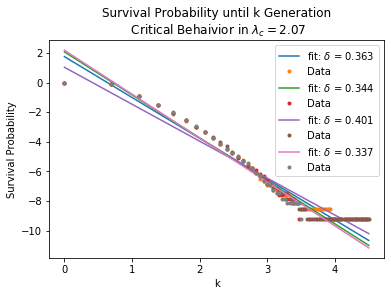

In [94]:
%%time

generation = 90
samples    = 10000

survival = np.zeros(generation)

lam = 2
for lam in [2.22, 2.23, 2.25, 2.26]:
    survival = 0
    for s in range(samples):
        survival += population(lam, generation)
    survival_probability = survival / samples
    print(survival_probability[6:])

    k    = np.log(np.arange(generation)+1)
    size = np.size(survival_probability[survival_probability>0])
    fit3 = np.polyfit(k[0:size], np.log(survival_probability[0:size]), 1)
    delta = -1/fit3[0]
    Q = plt.plot(k, fit3[0] * k + fit3[1], label = f'fit: $\delta$ = {np.round(delta, 3)}')
    plt.plot(k, np.log(survival_probability), '.', label = 'Data')

    plt.legend()

    plt.title("Survival Probability until k Generation\n Critical Behaivior in $\lambda_c = 2.07$")
    plt.ylabel("Survival Probability")
    plt.xlabel("k")

Hmm.... $\lambda_c ~ 2.25$??